# **Data Wrangling in Python with Pandas**

Go through this notebook to walk through a sample workflow for data wrangling.

# **Import Packages**

In [1]:
import pandas as pd
import numpy as np
import missingno

import sys

sys.path.append("../../")  # include parent directory

# **Load data**

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/chiaraledesma/nyc_yellow_trips_2018_sample/master/nyc_yellow_trips.csv",
    # Need to specify which are the date columns so that you can use date functions on them later!
    parse_dates=["pickup_datetime", "dropoff_datetime"],
)

In [3]:
# Save a raw DF in case you mess up
df_raw = df.copy()

In [4]:
df.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2,2084-04-11 11:41:00,2084-04-11 11:59:00,1,1.65,1,N,2,12.5,NaN,0.5,NaN,NaN,0.3,13.3,68,237
1,2,2084-04-11 12:32:00,2084-04-11 12:47:00,1,1.34,1,N,2,10.0,NaN,0.5,NaN,NaN,0.3,10.8,238,236
2,2,2084-04-11 11:02:00,2084-04-11 11:15:00,1,1.85,1,N,2,10.0,NaN,0.5,NaN,NaN,0.3,10.8,113,137
3,2,2084-04-11 11:27:00,2084-04-11 11:39:00,1,1.07,1,N,2,9.0,NaN,0.5,NaN,NaN,0.3,9.8,170,68
4,2,2084-04-11 11:02:00,2084-04-11 11:15:00,1,1.85,1,N,2,10.0,NaN,0.5,NaN,NaN,0.3,10.8,113,137


# **Profile and explore data**

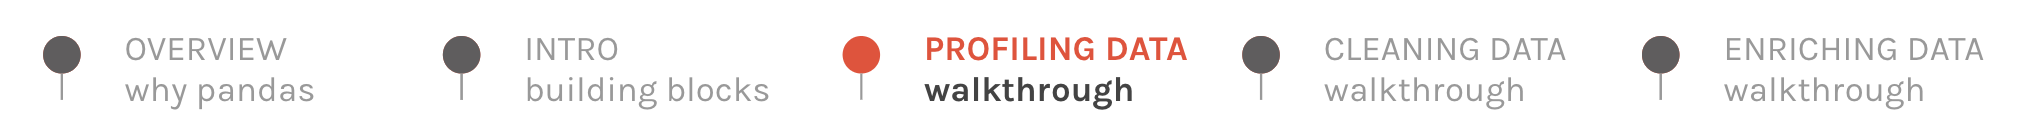

🏁 **Tips and Tricks Flag**
> *Look for a data dictionary (if available)!!! It provides a lot of domain knowledge that keeps you from guessing.*

Columns according to the data dictionary:
- **vendor_id**: A code indicating the TPEP provider that provided the record.
1= Creative Mobile Technologies, LLC; 2= VeriFone Inc
- **pickup_datetime**: The date and time when the meter was engaged.
- **dropoff_datetime**: The date and time when the meter was disengaged.
- **passenger_count**: The number of passengers in the vehicle.
This is a driver-entered value.
- **trip_distance**: The elapsed trip distance in miles reported by the taximeter.
- **pickup_location_id**: TLC Taxi Zone in which the taximeter was engaged
- **dropoff_location_id**: TLC Taxi Zone in which the taximeter was disengaged
- **rate_code**: The final rate code in effect at the end of the trip.
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride
- **store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server.
Y= store and forward trip
N= not a store and forward trip
- **payment_type**: A numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip
- **fare_amount**: The time-and-distance fare calculated by the meter.
- **extra**: Miscellaneous extras and surcharges. Currently, this only includes
the 0.50 and 1 dollar rush hour and overnight charges.
- **mta_tax**: 0.50 MTA tax that is automatically triggered based on the metered
rate in use.
- **imp_surcharge**: $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
- **tip_amount**: Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
- **tolls_amount**: Total amount of all tolls paid in trip.
- **total_amount**: The total amount charged to passengers. Does not include cash tips.

In [5]:
# Get number of rows, columns of DataFrame

df.shape

(10500, 17)

In [6]:
# Get column names

df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   vendor_id            10500 non-null  int64         
 1   pickup_datetime      10500 non-null  datetime64[ns]
 2   dropoff_datetime     10500 non-null  datetime64[ns]
 3   passenger_count      10500 non-null  int64         
 4   trip_distance        10500 non-null  float64       
 5   rate_code            10500 non-null  int64         
 6   store_and_fwd_flag   10500 non-null  object        
 7   payment_type         10500 non-null  int64         
 8   fare_amount          10487 non-null  float64       
 9   extra                4641 non-null   float64       
 10  mta_tax              10500 non-null  float64       
 11  tip_amount           10104 non-null  float64       
 12  tolls_amount         3966 non-null   float64       
 13  imp_surcharge        10500 non-

In [8]:
df.describe()

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
count,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10487.000000,4641.000000,10500.000000,10104.000000,3966.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,1.613238,1.560857,38.333547,1.276667,1.031333,56.538804,0.704501,0.482321,7.633597,7.213822,0.299629,67.642465,153.869333,153.039238
std,0.520497,1.202836,1855.031161,0.959574,0.188409,304.346638,0.366325,0.613470,7.581235,6.134389,0.011333,304.669846,60.516251,78.059690
min,1.000000,0.000000,0.000000,1.000000,1.000000,-0.010000,-1.510000,-0.500000,-0.500000,1.750000,-0.300000,-1.310000,1.000000,1.000000
25%,1.000000,1.000000,6.460000,1.000000,1.000000,24.500000,0.500000,0.500000,5.060000,5.760000,0.300000,31.000000,132.000000,90.000000
50%,2.000000,1.000000,8.830000,1.000000,1.000000,29.500000,0.500000,0.500000,6.650000,5.760000,0.300000,40.260000,138.000000,145.000000
75%,2.000000,2.000000,11.260000,1.000000,1.000000,37.500000,1.000000,0.500000,8.560000,5.760000,0.300000,51.060000,186.000000,231.000000
max,4.000000,7.000000,189483.840000,5.000000,4.000000,9999.500000,17.500000,55.740000,414.120000,155.760000,0.300000,10005.720000,265.000000,265.000000


## Let's browse through our data

`value_counts()` shows the count of rows per unique value, sorted from most frequent to least frequent. 

In [9]:
df.payment_type.value_counts()

1    10197
2      278
3       24
4        1
Name: payment_type, dtype: int64

In [10]:
df[df["total_amount"] == 0]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
10485,2,2018-01-29 08:53:00,2018-01-29 11:43:00,1,119.92,5,N,2,NaN,NaN,0.0,NaN,NaN,0.0,0.0,193,265


# **Data Cleaning**

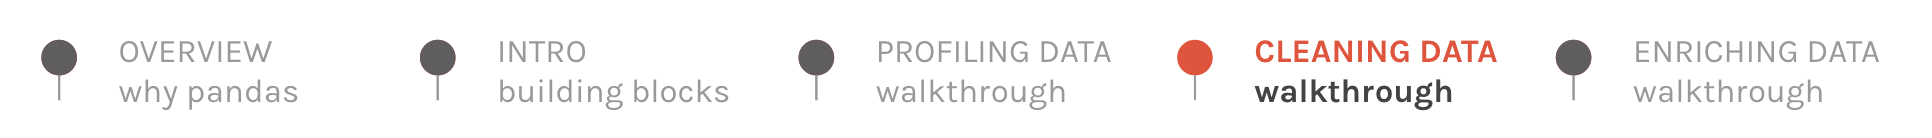

Cleaning: To clean our data, we'll need to work with:

- **Missing values**: Either omit elements from a dataset that contain missing values or impute them (fill them in).
- **Special values**: Numeric variables are endowed with several formalized special values including ±Inf, NA and NaN. Calculations involving special values often result in special values, and need to be handled/cleaned.
- **Outliers**: They should be detected, but not necessarily removed. Their inclusion in the analysis is a statistical decision.
- **Obvious inconsistencies**: A person's age cannot be negative, a man cannot be pregnant and an under-aged person cannot possess a drivers license. Find the inconsistencies and plan for them.

*Content above not mine. Credits to `@dformoso` on GitHub for this (linked in the references).*

## Drop duplicates

In [11]:
df.drop_duplicates(inplace=True)
# Can also do df = df.drop_duplicates()

In [12]:
df.shape

(10434, 17)

## See missing data with missingno library

<AxesSubplot:>

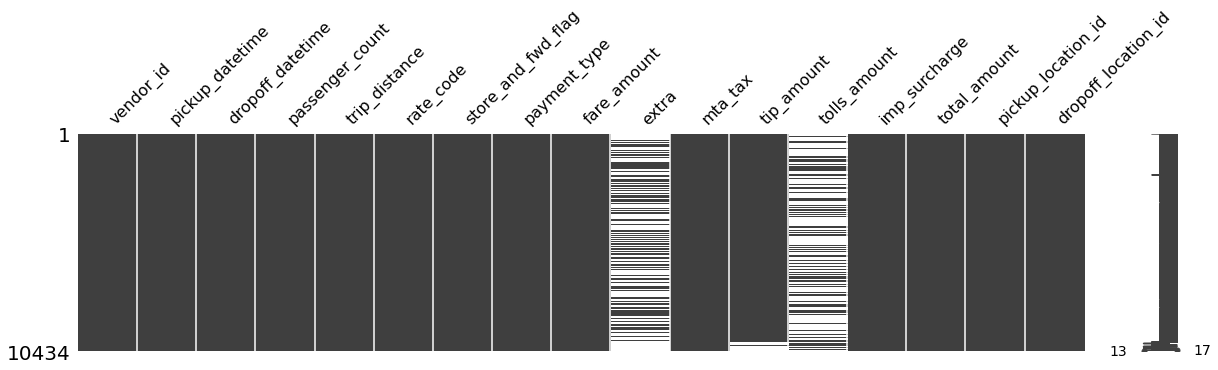

In [13]:
missingno.matrix(df, figsize=(20, 4))

<AxesSubplot:>

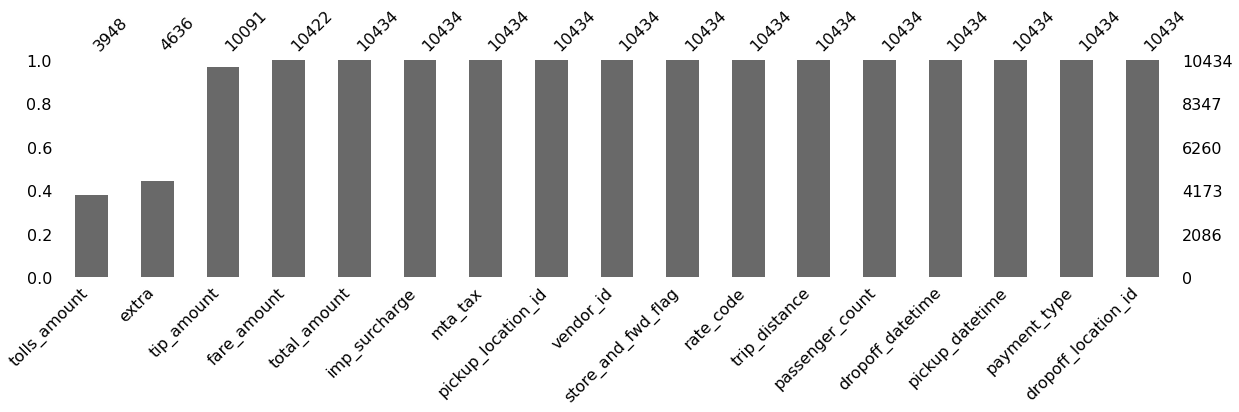

In [14]:
missingno.bar(df, sort="ascending", figsize=(20, 4))

## Handling missing values

**Imputation**: We can impute missing values in a number of different ways:
- **Hot-Deck**: The technique then finds the first missing value and uses the cell value immediately prior to the data that are missing to impute the missing value.
- **Cold-Deck**: Selects donors from another dataset to complete missing data.
- **Mean-substitution**: Another imputation technique involves replacing any missing value with the mean of that variable for all other cases, which has the benefit of not changing the sample mean for that variable.
- **Regression**: A regression model is estimated to predict observed values of a variable based on other variables, and that model is then used to impute values in cases where that variable is missing.

#### What if we're filling only one missing column?

Let's fill the invalid `tolls_amount` with $0 

In [15]:
df["tolls_amount"] = df["tolls_amount"].fillna(0)

Since the missing columns are all money-related, we might be able to safely impute the missing values as zero. Quick catch - this does not apply to `fare_amount` since there's a base fee. (i.e There's no valid taxi trip where you pay nothing.) 

Maybe a fairer imputation would be to fill by mean/median or to remove rows where `fare_amount` is zero altogether. This is a judgment call but for now let's see how we can impute by mean/median.

In [16]:
df["fare_amount"] = df["fare_amount"].fillna(df["fare_amount"].median())

Now we can impute for the rest of the money-related columns.

In [17]:
df[["tolls_amount", "extra", "tip_amount"]] = df[
    ["tolls_amount", "extra", "tip_amount"]
].fillna(0)

If we want to treat **all** the missing values the same way, we can use `fillna` on the whole DF

In [18]:
df.fillna(0, inplace=True)
# Or df = df.fillna(0)

Okay now let's check!

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10434 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   vendor_id            10434 non-null  int64         
 1   pickup_datetime      10434 non-null  datetime64[ns]
 2   dropoff_datetime     10434 non-null  datetime64[ns]
 3   passenger_count      10434 non-null  int64         
 4   trip_distance        10434 non-null  float64       
 5   rate_code            10434 non-null  int64         
 6   store_and_fwd_flag   10434 non-null  object        
 7   payment_type         10434 non-null  int64         
 8   fare_amount          10434 non-null  float64       
 9   extra                10434 non-null  float64       
 10  mta_tax              10434 non-null  float64       
 11  tip_amount           10434 non-null  float64       
 12  tolls_amount         10434 non-null  float64       
 13  imp_surcharge        10434 non-

### Drop columns we won't need/use for these purposes

In [20]:
df.drop(
    columns=["imp_surcharge", "mta_tax", "vendor_id", "store_and_fwd_flag", "extra"],
    inplace=True,
)
# or: df = df.drop(['imp_surcharge', 'mta_tax', 'vendor_id', 'store_and_fwd_flag', 'extra'], axis=1)

## Validation: Check for inconsistencies

Can do this in two ways:
- Top-down / Hypothesis-based: What constitutes a valid trip? What characterize invalid dates?
- Bottom-up: Just sense check every column (e.g. `df.describe`)

### Sense check the dates! Acc. to the dataset description, this should be 2018 only

Remember when we used `parse_dates` to read the csv file into Pandas?

Thanks to this, we can access particular date attributes like the `year` 

In [21]:
df["pickup_datetime"].dt.year.value_counts()

2018    10426
2084        8
Name: pickup_datetime, dtype: int64

Seems to be the same entries, so we may only have to change either the `pickup` or `dropoff` datetime columns.

Judgment call: Should we change the year to 2018 or remove the bad entries?

In [22]:
df = df[df["pickup_datetime"].dt.year == 2018]

### Sense check the trip distance

Trip distance is a continuous variable (unlike year, which has limited possible values). How do we check the different trip distances?

It doesn't make sense to use `value_counts()` because we will get thousands of results.

Instead, we can visualize the distribution through plotting a histogram through Pandas

<AxesSubplot:ylabel='Frequency'>

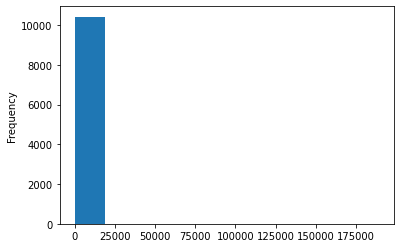

In [23]:
df["trip_distance"].plot.hist()

Doesn't look right -- why is there a value near 175,000?

In [24]:
df["trip_distance"].max()

189483.84

Mmmmm that's no good. The US is only 2-3k miles wide so distances like above don't make sense.

NYC is only 13.4 miles long. If our definition of a taxi trip is one that starts and ends in NY,

then let's set a valid trip to be one within 15 miles (arbitrary) that is completed within x hours

In [25]:
df = df[df["trip_distance"] <= 15]

Sense check! 

<AxesSubplot:ylabel='Frequency'>

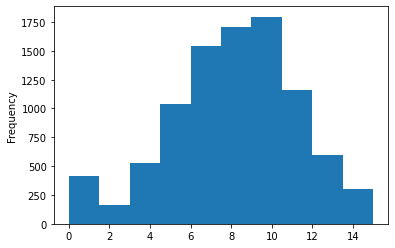

In [26]:
df["trip_distance"].plot.hist()

### Sense check the trip duration -- there shouldn't be trips that are several hours/days long

We don't have a `trip_duration` column, so first we have to make it by subtracting the dropoff time from pickup time

---



In [27]:
df["trip_duration"] = (df["dropoff_datetime"] - df["pickup_datetime"]).astype(
    "timedelta64[m]"
)

There shouldn't be any trips with 0 or  negative `trip_duration` - but let's check

In [28]:
df[df["trip_duration"] <= 0]

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,pickup_location_id,dropoff_location_id,trip_duration
32,2018-07-11 20:10:00,2018-07-11 20:10:00,5,0.00,5,1,64.2,12.00,0.0,77.00,230,230,0.0
63,2018-04-09 15:34:00,2018-04-09 15:34:00,1,0.00,5,1,59.0,11.96,0.0,71.76,164,164,0.0
81,2018-10-06 16:18:00,2018-10-06 16:18:00,1,0.00,1,1,2.5,0.80,0.0,4.10,145,145,0.0
107,2018-10-17 20:20:00,2018-10-17 20:20:00,1,0.00,5,1,63.0,10.00,0.0,73.80,87,87,0.0
165,2018-05-20 06:26:00,2018-05-20 06:26:00,1,0.00,5,1,64.5,6.00,0.0,70.80,264,107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,2018-03-23 15:33:00,2018-03-23 15:33:00,3,0.00,5,1,43.0,8.66,0.0,51.96,138,138,0.0
9890,2018-04-09 11:52:00,2018-04-09 11:52:00,1,0.00,5,1,4.8,1.12,0.0,6.72,143,143,0.0
9908,2018-06-21 09:35:00,2018-06-21 09:35:00,1,0.00,1,1,2.5,11.70,0.0,15.00,161,161,0.0
9942,2018-11-30 23:32:00,2018-01-12 00:05:00,1,6.85,1,1,26.5,5.56,0.0,33.36,4,151,-465087.0


<AxesSubplot:ylabel='Frequency'>

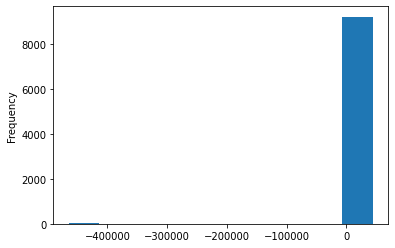

In [29]:
df["trip_duration"].plot.hist()

OK, so we have to get rid of the trips that last negative time, and also the trips that are too long (44,639 minutes does not sound right).

For our purposes let's set the cap at 6 hrs. 

In [30]:
df = df[(df.trip_duration > 0) & (df.trip_duration <= 360)]

Sense check if it looks normal

<AxesSubplot:ylabel='Frequency'>

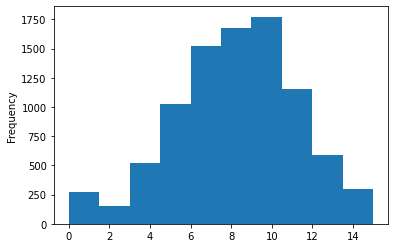

In [31]:
df.trip_distance.plot.hist()

### Sense check payment fields

Let's also look at all the payment-related columns and check if they have outlier values (min, max).

In [32]:
df[["fare_amount", "tip_amount", "tolls_amount", "total_amount"]].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,8970.000000,8970.000000,8970.000000,8970.000000
mean,29.555322,6.683725,2.149369,39.516242
std,9.373226,2.890261,2.902520,12.935230
min,-0.010000,-0.500000,0.000000,-1.310000
25%,24.000000,4.960000,0.000000,30.800000
50%,28.500000,6.360000,0.000000,38.160000
75%,34.000000,8.010000,5.760000,46.910000
max,230.000000,105.000000,21.300000,276.960000


<AxesSubplot:ylabel='Frequency'>

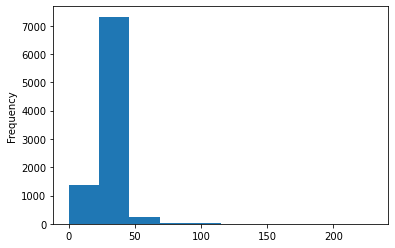

In [33]:
df.fare_amount.plot.hist()

Looks like there are outlier fares that were above $150. Depending on our use case we can choose to leave this in, remove them completely, or clip them.

If we decide to clip them...

In [34]:
df["fare_amount"] = df["fare_amount"].clip(upper=150)
df["total_amount"] = df["total_amount"].clip(upper=200)

Let's get rid of the negative values also

In [35]:
df["tip_amount"] = df["tip_amount"].clip(lower=0)
df["fare_amount"] = df["fare_amount"].clip(lower=0)
df["total_amount"] = df["total_amount"].clip(lower=0)

# **Feature Engineering**

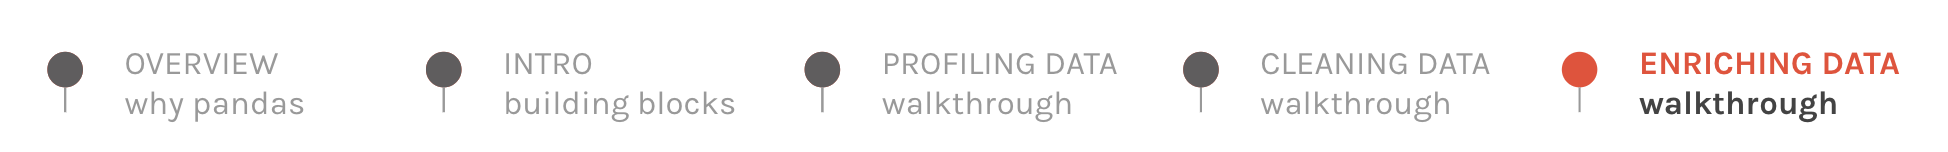

There are multiple techniques for feature engineering:

- **Decompose**: Converting 2014-09-20T20:45:40Z into categorical attributes like hour_of_the_day, part_of_day, etc.
- **Discretization**: We can choose to either discretize some of the continuous variables we have, as some algorithms will perform faster.
- **Reframe Numerical Quantities:** Changing from grams to kg, and losing detail might be both wanted and efficient for calculation
- **Feature Crossing**: Creating new features as a combination of existing features. Could be multiplying numerical features, or combining categorical variables. This is a great way to add domain expertise knowledge to the dataset.

## Decompose date features

### Make day of week and hour feature by assignment

In [36]:
# The day of the week with Monday=0, Sunday=6.

df["pickup_day_of_week"] = df["pickup_datetime"].dt.dayofweek
df["pickup_hour"] = df["pickup_datetime"].dt.hour

## Discretize days of the week by making weekend feature with `df.loc`

In Pandas, 0 is Monday, 6 is Sunday

In [37]:
df.loc[df["pickup_day_of_week"] >= 5, "is_weekend"] = 1
df.loc[df["pickup_day_of_week"] < 5, "is_weekend"] = 0

## Make binary features

### Make tip feature with `map`

In [38]:
def has_tip(tip):
    if tip > 0:
        return 1
    return 0


# Use map function on a Series i.e. can only use with one column
df["has_tip"] = df.tip_amount.map(has_tip)

In [39]:
df.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,pickup_location_id,dropoff_location_id,trip_duration,pickup_day_of_week,pickup_hour,is_weekend,has_tip
16,2018-08-22 16:15:00,2018-08-22 16:52:00,1,6.50,1,1,25.5,5.45,0.00,32.75,163,244,37.0,2,16,0.0,1
17,2018-08-22 16:12:00,2018-08-22 16:49:00,1,4.90,1,1,24.0,6.45,0.00,32.25,161,13,37.0,2,16,0.0,1
18,2018-07-10 08:21:00,2018-07-10 08:43:00,2,8.50,1,1,26.0,4.88,5.76,37.44,17,233,22.0,1,8,0.0,1
19,2018-08-22 15:22:00,2018-08-22 15:57:00,1,10.40,1,1,33.0,10.40,0.00,45.20,233,128,35.0,2,15,0.0,1
20,2018-07-11 22:17:00,2018-07-11 22:37:00,2,7.88,1,1,24.5,5.16,0.00,30.96,140,25,20.0,2,22,0.0,1


### Alternative: Make tip feature with `np.where`

This is using a function from NumPy - another module that is separate from but often used together with Pandas. 

`np.where( [Boolean condition], [value if true], [value if false] )`

In [40]:
df["has_tip"] = np.where(df["tip_amount"] > 0, 1, 0)

### Make rush hour feature with `apply`

In [41]:
def rush_hour(day_of_week, pickup_hour):
    if (day_of_week < 5) and (16 <= pickup_hour <= 20):
        return 1
    return 0

In [42]:
# Use apply / lambda functions for more than one column
df["is_rush_hour"] = df.apply(
    lambda x: rush_hour(x["pickup_day_of_week"], x["pickup_hour"]), axis=1
)

# **Save DF**

Are we done? Sweet. 🤩
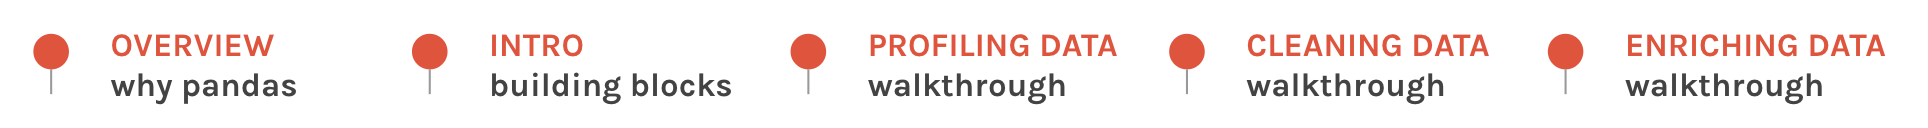

In [43]:
df.head(5)

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,pickup_location_id,dropoff_location_id,trip_duration,pickup_day_of_week,pickup_hour,is_weekend,has_tip,is_rush_hour
16,2018-08-22 16:15:00,2018-08-22 16:52:00,1,6.50,1,1,25.5,5.45,0.00,32.75,163,244,37.0,2,16,0.0,1,1
17,2018-08-22 16:12:00,2018-08-22 16:49:00,1,4.90,1,1,24.0,6.45,0.00,32.25,161,13,37.0,2,16,0.0,1,1
18,2018-07-10 08:21:00,2018-07-10 08:43:00,2,8.50,1,1,26.0,4.88,5.76,37.44,17,233,22.0,1,8,0.0,1,0
19,2018-08-22 15:22:00,2018-08-22 15:57:00,1,10.40,1,1,33.0,10.40,0.00,45.20,233,128,35.0,2,15,0.0,1,0
20,2018-07-11 22:17:00,2018-07-11 22:37:00,2,7.88,1,1,24.5,5.16,0.00,30.96,140,25,20.0,2,22,0.0,1,0


In [45]:
df.to_csv("../../../data/data_cleaned.csv", index=False)

# **Final notes**

## **Other things you can do with Pandas**
- Read BQ data (`pd.read_gbq()`)
- Styling/Conditional foramtting
- Data visualization (also with `matplotlib` or `seaborn`)
- so much tbh

## **Learn Pandas!**


1. [Pandas documentation](https://pandas.pydata.org/docs/index.html) is useful when you're searching for specific functions. Google/StackOverflow are your friends too!
2. [10 minute intro](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) from Pandas developers (warning: brief explanations, not easy for coding beginners)
3. DataQuest articles: [Part 1](https://www.dataquest.io/blog/pandas-python-tutorial/) | [Part 2](https://www.dataquest.io/blog/pandas-tutorial-python-2/)
4. [DataCamp](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)

## **Some EDA reads to start with**
Read other people's code / notebooks / blog posts!
1. [This notebook](https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb) for EDA on US Census Income data
2. [Gentle Introduction to EDA](https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184) on Medium/Towards Data Science

## Install Pandas on your local (your laptop)

Two options:
1. Install [Python 3](https://www.python.org/downloads/) and [pip](https://pip.pypa.io/en/stable/installing/). Then on your terminal/command line, execute `pip install pandas`. You can now `import pandas` in a Python script or notebook
2. Easier for beginners: Install [Anaconda](https://www.anaconda.com/) which gives you access to notebooks - pandas is already built in.

### Some resources for best coding practices
1. [PEP 8](https://www.python.org/dev/peps/pep-0008/) is the style guide for writing Python code 
2. Use virtual environments. See [this blog for a gentle introduction](https://medium.com/@dakota.lillie/an-introduction-to-virtual-environments-in-python-ce16cda92853)
3. If you want a more formal approach, you can try reading on popular Python resources like *Learning Python3 The Hard Way* or *Automate the Boring Stuff*. 